In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
#%matplotlib

C:\Python\python-3.6.2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


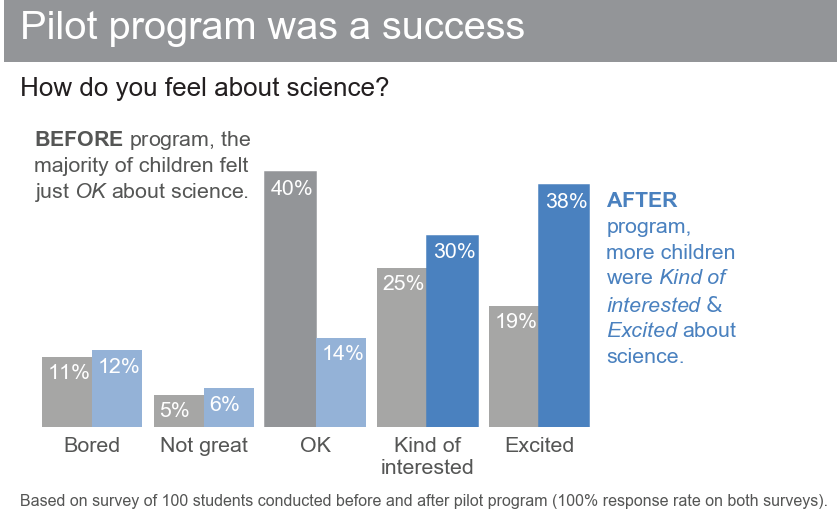

In [2]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

# survey responses
X = ['Bored', 'Not great', 'OK', 'Kind of\ninterested', 'Excited']
Y = [11, 5, 40, 25, 19] # responses distribution before the program
Z = [12, 6, 14, 30, 38] # responses distribution after the program

# Battleship Grey (footnote, category labels, pre- text note)
color_gray1 = '#555655'
# Bombay (pre- subcategory bars)
color_gray2 = '#A6A6A5'
# Grey Chateau (pre- subcategory bars highlighting, title background)
color_gray3 = '#939598'
# Nero (survey question)
color_gray4 = '#231F20'
# Polo Blue (post- subcategory bars)
color_blue1 = '#94B2D7'
# Havelock Blue (post- subcategory bars highlighting, post- text note)
color_blue2 = '#4A81BF'


# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)          # resolution of the figure

# remove chart borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines
plt.tick_params(bottom='off',     # don't draw buttom ticks
                left='off',       # don't draw left ticks
                labelleft='off',  # don't draw left tick labels
                labelbottom='on') # draw bottom tick labels

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0, right=0.735, top=0.665, bottom=0.17)

# titile the plot
plt.text(-0.65, 61,
         'Pilot program was a success'+' '*27, # trailing whitespaces for background
         fontsize=26, 
         color='white', 
         # put a rectangular box around the text to set a background color
         bbox={'facecolor':color_gray3, # background color
               'pad':10,                # add more padding
               'edgecolor':'none'})     # no border

# add survey question
plt.text(-0.65, 52, 'How do you feel about science?', fontsize=17, color=color_gray4)

# add footnote with the data source
plt.text(-0.65, -12.5, 
         'Based on survey of 100 students conducted '
         'before and after pilot program '
         '(100% response rate on both surveys).', 
         fontsize=10.5,
         color=color_gray1)

# There is no automatic support of subcategories bar plot in matplotlib.
def subcategorybar(X,              # categories names
                   vals,           # subcategories values
                   base_colors,    # base colors for each subcategory
                   special_colors, # highlight colors for subcategories
                   special_bars,   # highlighted bars indicies for each subcategory
                   width=0.9):     # total subcategories bars width
    n = len(vals)
    _X = np.arange(len(X))    
    for i in range(n):
        # draw i-th subcategory bars
        bars = plt.bar(_X - width/2. + i/float(n)*width,
                       vals[i],                
                       width=width/float(n),   
                       align="edge",           # aligns bars by their left edges
                       color=base_colors[i])   # use base color for subcategory
        
        # add numerical data labels for each bar
        for bi, b in enumerate(bars):
            plt.text(b.get_x()+0.05, b.get_height()-3.5, 
                     str(vals[i][bi])+ '%',            
                     fontsize=14,                      
                     color='white')
        # highlight bars
        if special_bars[i] != None:
            for special_bar_i in special_bars[i]:
                bars[special_bar_i].set_color(special_colors[i])
    # set category tick locations and labels of the x-axis
    plt.xticks(_X, X)

# draw subcategorical vertical bar plot
subcategorybar(X,                          # responses
               [Y, Z],                     # pre- and post- responses distribution
               [color_gray2, color_blue1], # colors for pre- and post- bars
               [color_gray3, color_blue2], # highlight colors for pre- and post- bars
               [[2], [3, 4]])              # highlight 3rd pre- and 4th,5th post- bar

# configure responses labels appearance
for item in plt.gca().get_xticklabels():
    item.set_fontsize(14)
    item.set_color(color_gray1)
    
# add pre- note to plot
plt.text(-0.52, 36, 
         '$\\bf{BEFORE}$ program, the\n'       # use mathtext \\bf for bold text
         'majority of children felt\n' 
         'just $\\mathit{OK}$ about science.', # use mathtext \\mathit for italic text
         fontsize=14, 
         linespacing=1.3,                      # multiple of font size
         color=color_gray1)

# add post- note to plot
plt.text(4.6, 10, 
         '$\\bf{AFTER}$\n'                     # use mathtext \\b for bold text
         'program,\n'
         'more children\n'
         'were $\\it{Kind\ of}$\n'             # use mathtext \\mathit for italic text
         '$\\it{interested\ &}$\n'
         '$\\it{Excited}$ about\n'
         'science.', 
         fontsize=14, 
         linespacing=1.45,                     # multiple of font size
         color=color_blue2)